# BEHI 5003
## Tutorial: Homework 1
### Author: Won Joon Kim
### Affiliation: Biomolecular Engineering Lab (BEL), CBE, HKUST

I acknowledge the use of generative AI (Gemini Agent in Colab) in writing the code below.

This notebook is a revision of the Jupyter notebook authored by Mr. Mingyi Sun (BEL, CBE, HKUST) during the Fall 2024 offering of BIEN 6930B (this course).

I sincerely thank the authors and maintainers of the packages used in this tutorial!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from IPython.display import display, clear_output

# Background to Metropolis Monte Carlo simulation


### Monte Carlo simulation example: Coin Flip
For a more theoretical background, you may refer to this [Wikipedia page](https://en.wikipedia.org/wiki/Monte_Carlo_method) or this [YouTube video](https://www.youtube.com/watch?v=r7cn3WS5x9c).

As you are already aware, we associate coin flips as being "fair",\
i.e., the chances of getting a head or a tail are (approximately) equal (0.5).

But can the computer, without being told that this is actually the case, elude this result independently?

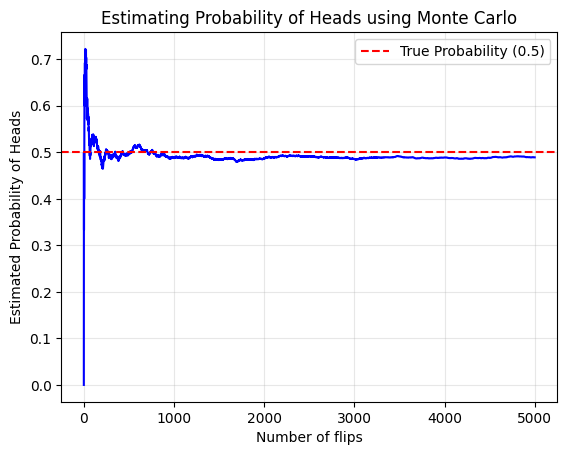

Final results:
Number of flips: 5000
Number of heads: 2446
Estimated probability of heads: 0.4892


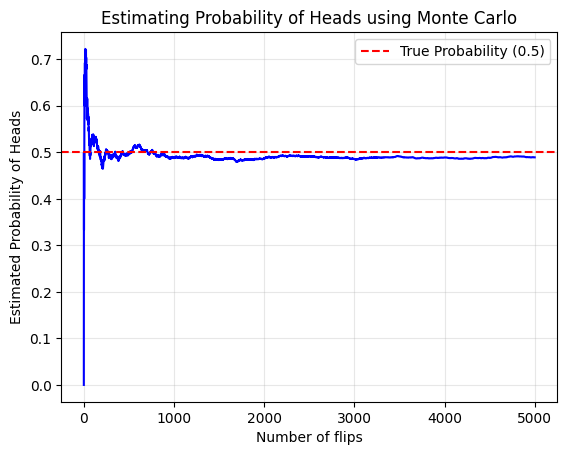

In [ ]:
# Number of coin flips to simulate
num_flips = 5000

# Counter for heads
heads_count = 0

# Lists to store iteration number and estimated probability of heads for plotting
iterations = []
estimated_probabilities = []

# Set up the plot
plt.xlabel('Number of flips')
plt.ylabel('Estimated Probability of Heads')
plt.title('Estimating Probability of Heads using Monte Carlo')
plt.axhline(0.5, color='red', linestyle='--', label='True Probability (0.5)') # Add a line for the true probability
plt.grid(True, alpha=0.3)
plt.legend()


# Simulate coin flips
for i in range(1, num_flips + 1):
    # Generate a random number between 0 and 1 from the standard normal distribution
    random_number = random.random()

    # If the number is less than 0.5, consider it heads (you can define heads as > 0.5 as well)
    if random_number < 0.5:
        heads_count += 1

    # Calculate the estimated probability of heads at the current iteration
    current_probability = heads_count / i

    # Store the data for plotting
    iterations.append(i)
    estimated_probabilities.append(current_probability)

    # Update the plot every 50 flips (or adjust as needed)
    if i % 100 == 0 or i == num_flips:
        plt.plot(iterations, estimated_probabilities, color='blue')
        plt.axhline(0.5, color='red', linestyle='--', label='True Probability (0.5)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.xlabel('Number of flips')
        plt.ylabel('Estimated Probability of Heads')
        plt.title('Estimating Probability of Heads using Monte Carlo')
        clear_output(wait=True) # Clear the previous output
        display(plt.gcf()) # Display the current figure
        plt.cla()



# show results
print("Final results:")
print(f"Number of flips: {num_flips}")
print(f"Number of heads: {heads_count}")
print(f"Estimated probability of heads: {current_probability}")
# After the loop, make sure the final plot is displayed
plt.plot(iterations, estimated_probabilities, color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='True Probability (0.5)')
plt.xlabel('Number of flips')
plt.ylabel('Estimated Probability of Heads')
plt.title('Estimating Probability of Heads using Monte Carlo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Metropolis Monte Carlo simulation example: 1D Random Walk with a Potential
For a more theoretical background, you may refer to this [Wikipedia page](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) or [YouTube video](https://www.youtube.com/watch?v=Jr1GdNI3Vfo).

Comments have been added to the code for explanation of each step.

In [ ]:
# Define the potential function (e.g., a simple quadratic potential)
# Think of this as the "hilly landscape" - the potential function tells us the "height" at any given "position".
def potential(x):
    return x**2

#@markdown Number of Monte Carlo steps (how many steps we take in our search)
n_steps = 5000  #@param {type:"raw"}

#@markdown Temperature parameter (kT) - this influences how likely we are to accept moves that go uphill.
kT = 0.5 #@param {type:"raw"}
#@markdown - A higher temperature means we are more likely to accept uphill moves, allowing us to explore more.
#@markdown - A lower temperature means we are less likely to accept uphill moves, making us more likely to settle in a low point.

#@markdown Initial position (where we start our search in the landscape)
current_position = 5.0 #@param {type:"raw"}

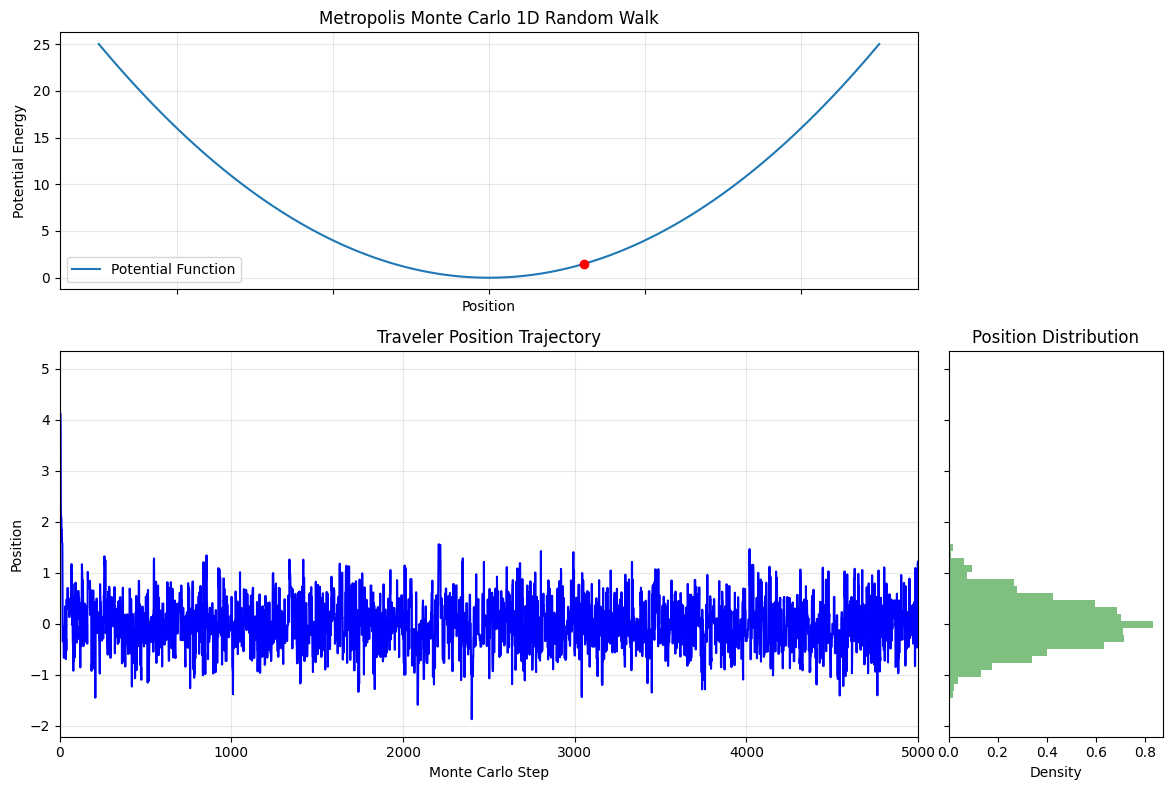

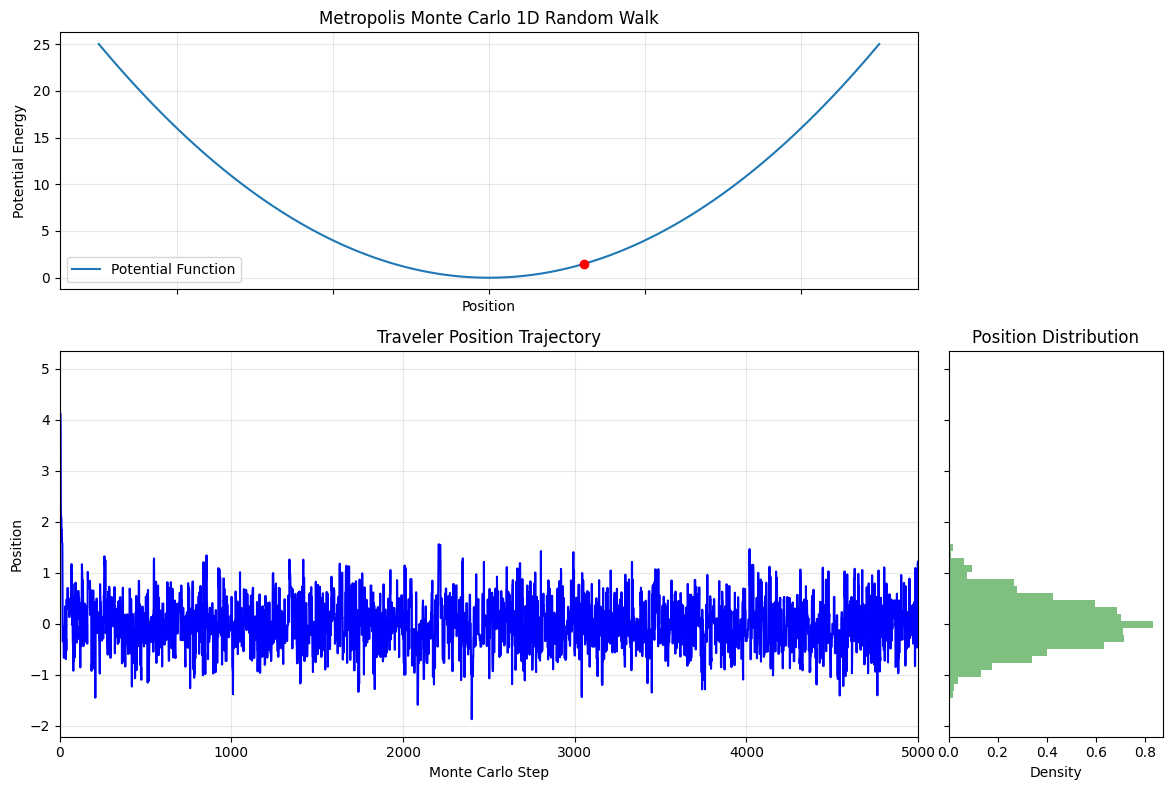

In [ ]:
# List to store the history of positions for the trajectory plot and marginal histogram
position_history = [current_position]

# Set up the plots (two subplots and a marginal axis)
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, width_ratios=[4, 1], height_ratios=[2, 3]) # Define grid for subplots with ratios - increased height of the first row

# Plot 1: Traveler on the Potential Function (Top-left)
ax1 = fig.add_subplot(gs[0, 0])
x_values = np.linspace(-5, 5, 100) # Generate x values to plot the potential
ax1.plot(x_values, potential(x_values), label='Potential Function')
ax1.set_xlabel('Position')
ax1.set_ylabel('Potential Energy')
ax1.set_title('Metropolis Monte Carlo 1D Random Walk')
ax1.grid(True, alpha=0.3)
ax1.legend()
# Create a point to represent the traveler
traveler_point, = ax1.plot([current_position], [potential(current_position)], 'ro') # 'ro' for red circle

# Plot 2: Position Trajectory (Bottom-left)
ax2 = fig.add_subplot(gs[1, 0]) # Removed sharex=ax1
ax2.set_xlabel('Monte Carlo Step')
ax2.set_ylabel('Position')
ax2.set_title('Traveler Position Trajectory')
ax2.grid(True, alpha=0.3)
trajectory_line, = ax2.plot(position_history, color='blue')
plt.setp(ax1.get_xticklabels(), visible=False) # Hide x-axis labels on the top plot

# Plot 3: Marginal Histogram of Positions (Bottom-right)
ax3 = fig.add_subplot(gs[1, 1], sharey=ax2) # Share y-axis with the trajectory plot
ax3.set_xlabel('Frequency')
ax3.set_title('Position Distribution')
plt.setp(ax3.get_yticklabels(), visible=False) # Hide y-axis labels on the marginal plot


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

# Metropolis Monte Carlo simulation
for step in range(n_steps):
    # Propose a new position (random walk step)
    # We randomly suggest moving to a new spot in the landscape.
    # Propose a move by adding a random number from a normal distribution - this determines how big and in what direction our proposed step is.
    proposed_position = current_position + random.gauss(0, 1)

    # Calculate the potential energy at the current and proposed positions
    # We find out the "height" of our current spot and the "height" of the proposed new spot.
    current_energy = potential(current_position)
    proposed_energy = potential(proposed_position)

    # Calculate the change in energy
    # We see if the proposed move goes uphill (positive dE) or downhill (negative dE).
    delta_E = proposed_energy - current_energy

    # Metropolis acceptance criterion
    # This is the rule for deciding whether to move to the proposed spot.
    # Calculate the probability of accepting the proposed move
    # If the energy decreases (delta_E < 0), P_accept is min(exp(-negative/kT), 1) which is 1 - we always accept moves that go downhill.
    # If the energy increases (delta_E >= 0), P_accept is exp(-positive/kT) - we might accept uphill moves, but the probability is lower for larger uphill steps and lower temperatures.
    P_accept = min(1, np.exp(-delta_E / kT))

    # Accept or reject the proposed move
    # We generate a random number and compare it to the acceptance probability.
    # Generate a random number between 0 and 1
    random_accept = random.random()
    # If the random number is less than P_accept, accept the move - if our random chance is less than the probability of accepting, we move.
    if random_accept < P_accept:
        current_position = proposed_position # We move to the new position

    # Store the current position for the trajectory plot and marginal histogram
    position_history.append(current_position)

    # Update the plots every 100 steps (or adjust as needed)
    if step % 100 == 0 or step == n_steps - 1:
        # Update traveler position on the first plot
        traveler_point.set_data([current_position], [potential(current_position)])

        # Update trajectory on the second plot
        trajectory_line.set_data(range(len(position_history)), position_history)
        ax2.set_xlim(0, len(position_history)) # Adjust x-axis limit of trajectory plot
        #ax2.set_ylim(min(position_history) - 0.5, max(position_history) + 0.5) # Adjust y-axis limit - removed because sharing y-axis with marginal plot

        # Update the marginal histogram
        ax3.cla() # Clear the previous histogram
        ax3.hist(position_history, bins=50, orientation='horizontal', density=True, color='green', alpha=0.5)
        ax3.set_xlabel('Density')
        ax3.set_title('Position Distribution')
        plt.setp(ax3.get_yticklabels(), visible=False)


        clear_output(wait=True)
        display(fig) # Display the entire figure with both subplots and marginal

From the marginal density histogram (green) on the right of the bottom subplot, we can observe that the original normal distribution can be "regenerated" from the trajectory of the traveler!

This again reinforces the law of large numbers!